## IPL ANALYSIS PROJECT

* Dataset: <a target="#" href="https://bit.ly/34SRn3b">Click Here.</a>
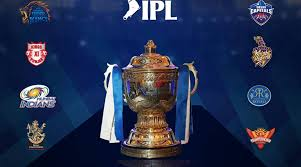


### Loading Datasets
So there are two datasets available with us. One contains the matches info and other contains the player info for a specific over and ball deliveries.

We will load both the datasets simultaneously and do the preprocessing of them and then do EDA of them one by one to find the meaningful insights out of them.

In [1]:
#importing necessary libraries
import pandas as pd  #for loading the datasets
import numpy as np  #for numerical computations
import matplotlib.pyplot as plt  #for visualization
import seaborn as sns  #for visualization

In [2]:
# loading matches dataset
matches = pd.read_csv(
    r"Datasets/matches.csv")

#loading deliveries dataset
deliveries = pd.read_csv(
    r'Datasets/deliveries.csv')

In [3]:
#printing first five rows of matches dataset
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#printing first five rows of deliveries dataset
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Preprocessing

In [5]:
#checking the info about matches dataset
matches.info()

#printing the shape
print("Shape:", matches.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
#checking the info about deliveries dataset
deliveries.info()

#printing the shape
print("Shape:", deliveries.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

So the match dataset contains 756 values and 18 features and there is no null values present. And the deliveries dataset contains 179078 values and 21 features and there is some null values present at the last three columns of the dataset.

By now we will not be doing anything with the null values because it may be good if we will consider them after finding insights of datasets.

Finally, lets check the duplicates values present or not in both and statistics of both and then we will move on to the EDA part


In [7]:
#checking the duplicates values of matches dataset
matches.duplicated().sum()

0

In [8]:
#checking the duplicates values of deliveries dataset
deliveries.duplicated().sum()

23

In [9]:
#deleting the duplicates values of deliveries
deliveries.drop_duplicates(inplace=True)

#printing shape after deletion
deliveries.shape

(179055, 21)

In [10]:
#checking the statistics of matches
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [11]:
#checking the statistics of deliveries
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000,179055.000000
mean,1801.169758,1.482969,10.162916,3.615543,0.000452,0.036726,0.004937,0.021133,0.004183,0.000056,1.246913,0.067035,1.313948
std,3471.116142,0.502075,5.677628,1.806869,0.021264,0.251177,0.116487,0.194907,0.070497,0.016711,1.608322,0.342567,1.605470
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


Now both the datasets is in good format and we are good to do the EDA of the datasets.
### Exploratory Data Analysis
Since we have two datasets to do analysis, so, not to rise confusion we will be doing EDA one by one of both datasets.

`So lets explore the matches dataset by grouping them in id wise team performance`

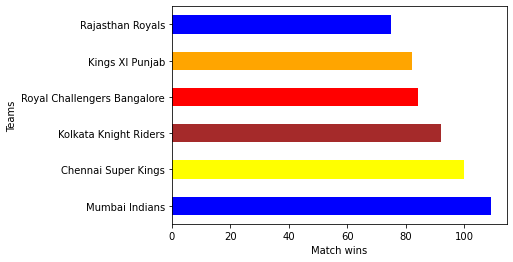

In [12]:
#grouping matchid by winner wise
team = matches.groupby('winner')['id'].count().sort_values(ascending=False)

# plotting the graph
team[:6].plot(kind="barh", color=["blue", "yellow", "brown", "red", "orange"])
plt.xlabel("Match wins")
plt.ylabel("Teams")
plt.show()

###### Interpretation - 
* So the top teams which win maximum matches are MI, CSK, KKR, RCB, KXIP and RR

`Lets find the season wise performance of these top teams`

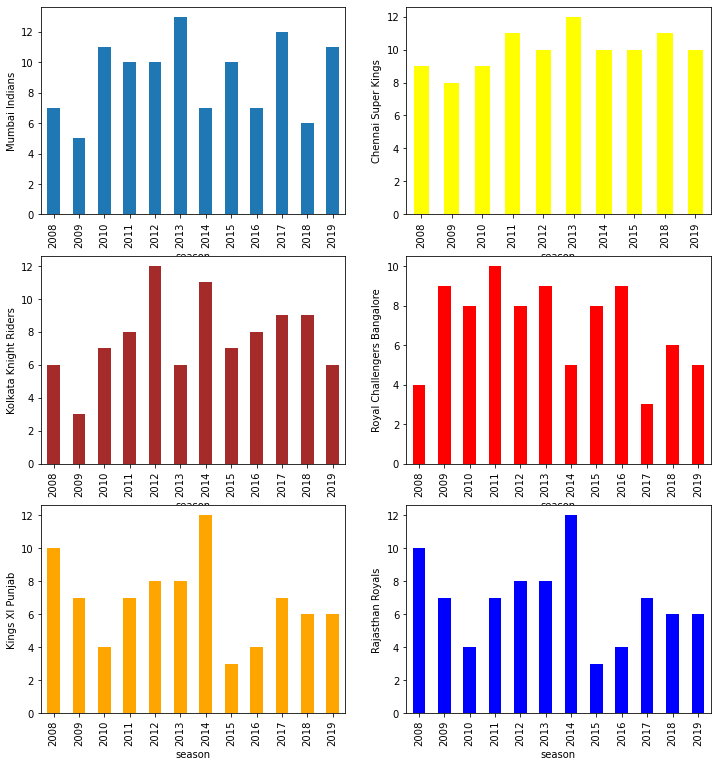

In [13]:
mi_df = matches[matches["winner"] == "Mumbai Indians"]
mi = mi_df.groupby("season")['id'].count()

csk_df = matches[matches["winner"] == "Chennai Super Kings"]
csk = csk_df.groupby("season")['id'].count()

kkr_df = matches[matches["winner"] == "Kolkata Knight Riders"]
kkr = kkr_df.groupby("season")['id'].count()

rcb_df = matches[matches["winner"] == "Royal Challengers Bangalore"]
rcb = rcb_df.groupby("season")['id'].count()

kxip_df = matches[matches["winner"] == "Kings XI Punjab"]
kxip = kxip_df.groupby("season")['id'].count()

rr_df = matches[matches["winner"] == "Rajasthan Royals"]
rr = rr_df.groupby("season")['id'].count()
# plotting the graph
plt.figure(figsize=(12, 13))
ax1 = plt.subplot(3, 2, 1)
mi.plot(kind="bar", ax=ax1)
ax1.set_ylabel('Mumbai Indians')

ax2 = plt.subplot(3, 2, 2)
csk.plot(kind="bar", ax=ax2, color="yellow")
ax2.set_ylabel('Chennai Super Kings')

ax3 = plt.subplot(3, 2, 3)
kkr.plot(kind="bar", ax=ax3, color="brown")
ax3.set_ylabel('Kolkata Knight Riders')

ax4 = plt.subplot(3, 2, 4)
rcb.plot(kind="bar", ax=ax4, color="red")
ax4.set_ylabel('Royal Challengers Bangalore')

ax5 = plt.subplot(3, 2, 5)
kxip.plot(kind="bar", ax=ax5, color="orange")
ax5.set_ylabel('Kings XI Punjab')

ax6 = plt.subplot(3, 2, 6)
kxip.plot(kind="bar", ax=ax6, color="blue")
ax6.set_ylabel('Rajasthan Royals')

plt.show()

###### Interpretation - 
* The performance of MI is like sea-saw trends. Precisely showing higher number of wins in odd seasons after 2012. So its a surprising insights we found.
* CSK showing a great performance all over the years.
* While KKR, RCB and KXIP RR is having average performance around the years 2008-2019.

`Lets check the performance of these top teams in home or out home wins.`


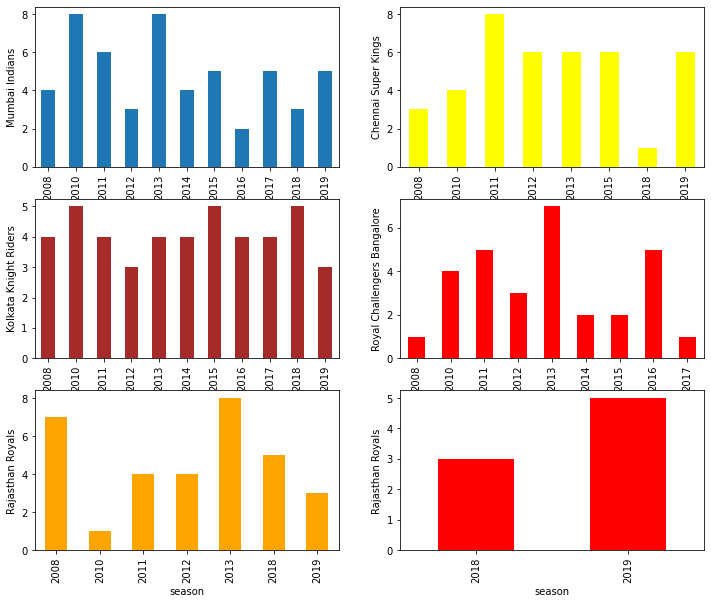

In [14]:
mum = matches["city"] == "Mumbai"
mum_win = matches["winner"] == "Mumbai Indians"
mum_win_df = matches[mum & mum_win]
mumbai = mum_win_df.groupby("season")['id'].count()

chen = matches["city"] == "Chennai"
chen_win = matches["winner"] == "Chennai Super Kings"
chen_win_df = matches[chen & chen_win]
chennai = chen_win_df.groupby("season")['id'].count()

kol = matches["city"] == "Kolkata"
kol_win = matches["winner"] == "Kolkata Knight Riders"
kol_win_df = matches[kol & kol_win]
kolkata = kol_win_df.groupby("season")['id'].count()

banga = matches["city"] == "Bangalore"
banga_win = matches["winner"] == "Royal Challengers Bangalore"
banga_win_df = matches[banga & banga_win]
bangalore = banga_win_df.groupby("season")['id'].count()

ras = matches["city"] == "Jaipur"
ras_win = matches["winner"] == "Rajasthan Royals"
ras_win_df = matches[ras_win & ras]
rajasthan = ras_win_df.groupby("season")['id'].count()

pun = matches["city"] == "Mohali"
pun_win = matches["winner"] == "Kings XI Punjab"
pun_win_df = matches[pun_win & pun]
punjab = pun_win_df.groupby("season")['id'].count()

plt.figure(figsize=(12, 10))
ax1 = plt.subplot(3, 2, 1)
mumbai.plot(kind="bar", ax=ax1)
ax1.set_ylabel('Mumbai Indians')

ax2 = plt.subplot(3, 2, 2)
chennai.plot(kind="bar", ax=ax2, color="yellow")
ax2.set_ylabel('Chennai Super Kings')

ax3 = plt.subplot(3, 2, 3)
kolkata.plot(kind="bar", ax=ax3, color="brown")
ax3.set_ylabel('Kolkata Knight Riders')

ax4 = plt.subplot(3, 2, 4)
bangalore.plot(kind="bar", ax=ax4, color="red")
ax4.set_ylabel('Royal Challengers Bangalore')

ax5 = plt.subplot(3, 2, 5)
rajasthan.plot(kind="bar", ax=ax5, color="orange")
ax5.set_ylabel('Rajasthan Royals')

ax5 = plt.subplot(3, 2, 6)
punjab.plot(kind="bar", ax=ax5, color="red")
ax5.set_ylabel('Rajasthan Royals')

plt.show()

###### Interpretation - 
* So the Mumbai Indians is not showing good performance in in-home matches which is a surprising trend while KKR and CSK has showing great performance in in-home matches

`Lets find the most valuable player of all teams`

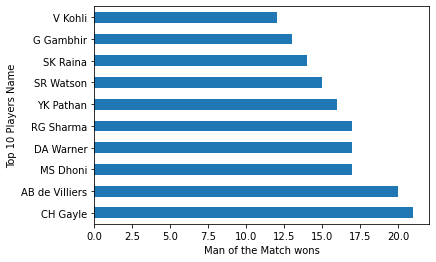

In [15]:
#grouping by player of the match
mvp = matches.groupby('player_of_match')['id'].count().sort_values(
    ascending=False)
mvp[:10].plot(kind="barh")
plt.xlabel('Man of the Match wons')
plt.ylabel('Top 10 Players Name')
plt.show()

###### Interpretation - 
* So Top 10 Most valuable players are Chris Gayle, ABD, MS Dhoni, DA Warner, Rohit Sharma, Yk Pathan, Shane Watson, Suresh Raina, Gautam Gambhir, Virat Kohli.

`Lets us see if the team won the toss then how much likely they won the match.`

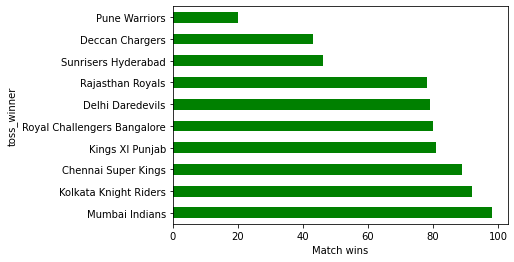

In [16]:
#grouping winnings by toss_win
toss = matches.groupby('toss_winner')["winner"].count().sort_values(
    ascending=False)
toss[:10].plot(kind="barh", color="green")
plt.xlabel('Match wins')
plt.show()

###### Interpretation - 
* So the top teams on the basis of toss win, they are winning the match are MI, KKR, CSK, KXIP, RCB, DD, RR

`Lets see the performance of teams on the basis of batting in 1st inning and 2nd inning`

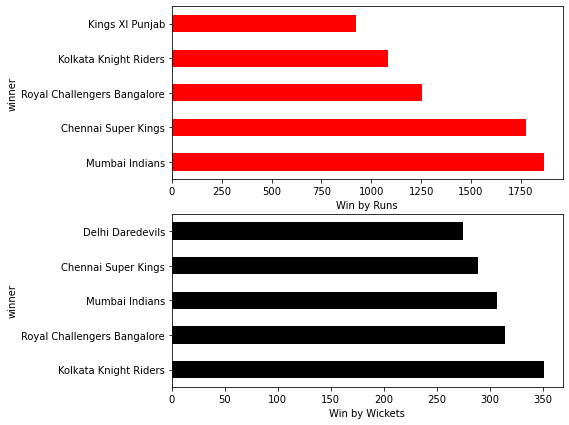

In [17]:
#grouping by batting first
bat_first = matches.groupby('winner')['win_by_runs'].sum().sort_values(
    ascending=False)
plt.figure(figsize=(7, 7))
ax1 = plt.subplot(2, 1, 1)
bat_first[:5].plot(kind="barh", ax=ax1, color="red")
ax1.set_xlabel('Win by Runs')

#grouping by batting second
bat_second = matches.groupby('winner')['win_by_wickets'].sum().sort_values(
    ascending=False)
ax2 = plt.subplot(2, 1, 2)
bat_second[:5].plot(kind="barh", ax=ax2, color="black")
ax2.set_xlabel('Win by Wickets')
plt.show()

##### Interpretation - 
* So MI has highest winnings on batting first followed by CSK, RCB, KKR, KXIP.
* KKR has highest win by wickets that means this team has good bowling lineup and other top 4 teams are RCB, MI, CSK, DD (which came as a suprising insights)

`Let us see the overall performance of Delhi Daredevils which came out as 5th highest teams to win by wickets`

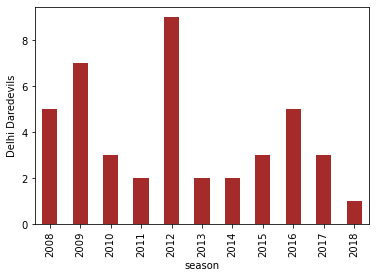

In [18]:
#grouping by seasons
delhi_df = matches.query('winner == "Delhi Daredevils" &  win_by_wickets>=1')
delhi = delhi_df.groupby('season')['id'].count()
delhi.plot(kind="bar", color="brown")
plt.ylabel("Delhi Daredevils")
plt.show()

###### Interpretation - 
* So the Delhi Daredevils has a best performance in 2012 and then next two seasons it degraded too much then in 2016 it has a good performance and then degraded in 2018. So this team is having a good performance in leap years

`Let us know the most valuable batsman from the deliveries dataset`

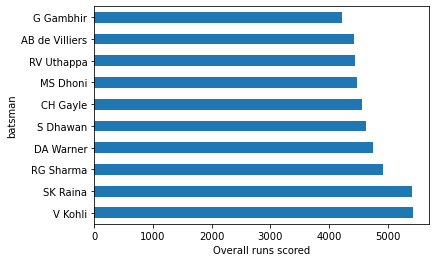

In [19]:
#grouping by top scorer batsman
batsman = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(
    ascending=False)

#plotting top 10 best batsman
batsman[:10].plot(kind="barh")
plt.xlabel('Overall runs scored')
plt.show()

###### Interpretation - 
* The most valuable batsman are - ['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle','MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir']

`Lets see the most valuable bowlers of all the seasons`

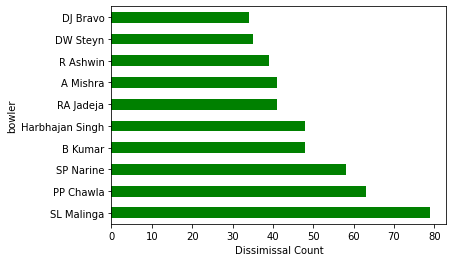

In [20]:
#grouping by tops wicket taking bowlers
wicket = deliveries.query(
    'dismissal_kind=="bowled" | dismissal_kind=="lbw" | dismissal_kind=="hit wicket" | dismissal_kind=="caught and bowled"'
)
bowling = wicket.groupby('bowler')['match_id'].count().sort_values(
    ascending=False)

#plotting top 10 bowlers
bowling[:10].plot(kind="barh", color="green")
plt.xlabel('Dissimissal Count')
plt.show()

###### Interpretation - 
* The most valuable bowlers which are dismissed the players by hit wicket or lbw or bowled or caught and bowled are - ['SL Malinga', 'PP Chawla', 'SP Narine', 'B Kumar', 'Harbhajan Singh','RA Jadeja', 'A Mishra', 'R Ashwin', 'DW Steyn', 'DJ Bravo']

`Let us see the top superheroes on the field`

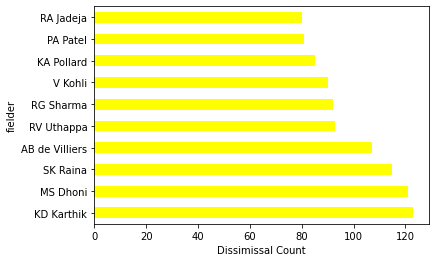

In [21]:
#grouping by fielder performance
field_df = deliveries.query(
    'dismissal_kind =="caught" | dismissal_kind =="run out" ')
fielders = field_df.groupby('fielder')['match_id'].count().sort_values(
    ascending=False)

#plotting top 10 bowlers
fielders[:10].plot(kind="barh", color="yellow")
plt.xlabel('Dissimissal Count')
plt.show()

###### Interpretation - 
* The top 10 most valuable fielders are - ['KD Karthik', 'MS Dhoni', 'SK Raina', 'AB de Villiers', 'RV Uthappa','RG Sharma', 'V Kohli', 'KA Pollard', 'PA Patel', 'RA Jadeja']

`Let us find the best wicket keepers of the seasons`

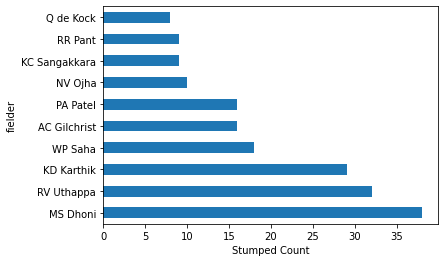

In [22]:
dismiss = deliveries.query('dismissal_kind=="stumped"')
wicket_keeper = dismiss.groupby('fielder')['match_id'].count().sort_values(
    ascending=False)

#plotting top 10 wicket keeper
wicket_keeper[:10].plot(kind="barh")
plt.xlabel('Stumped Count')
plt.show()

###### Interpretation - 
* So there are three most valuable wicket takers MS Dhoni, RV Uthappa, KD Karthik and rest are ['WP Saha', 'AC Gilchrist', 'PA Patel', 'NV Ojha', 'KC Sangakkara','RR Pant', 'Q de Kock']

###### Super Over performance
` Lets check the tops batsman performing in super over`

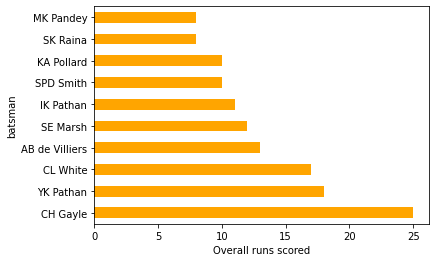

In [23]:
super_over = deliveries.query('is_super_over==1')
super_batsman = super_over.groupby(
    'batsman')['batsman_runs'].sum().sort_values(ascending=False)

#plotting top 10 best batsman
super_batsman[:10].plot(kind="barh", color="orange")
plt.xlabel('Overall runs scored')
plt.show()

###### Interpretation - 
* So the top 10 batsman who are performing best in the super over are Chris Gayle which is having best performance while Yusuf pathan and CL White are on 2nd and 3rd and rest are ['SE Marsh', 'IK Pathan', 'SPD Smith', 'KA Pollard', 'SK Raina','MK Pandey']

` Lets check the tops bowlers performing in super over`

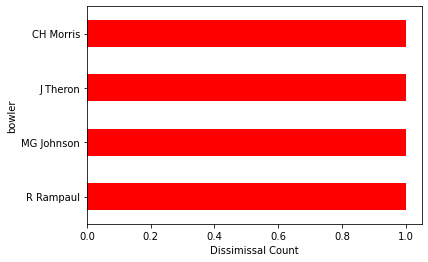

In [24]:
super_bowlerdf = super_over.query(
    'dismissal_kind=="bowled" | dismissal_kind=="lbw" | dismissal_kind=="hit wicket" | dismissal_kind=="caught and bowled"'
)
super_bowler = super_bowlerdf.groupby(
    'bowler')['match_id'].count().sort_values(ascending=False)

#plotting top 10 bowlers
super_bowler.plot(kind="barh", color="red")
plt.xlabel('Dissimissal Count')
plt.show()

###### Interpretation -
* The best bowlers who are performing best in super overs are R Rampaul, MG Jhonson, J Theron, CH Morris

`Lets analyze the tops fielders performing in super over`

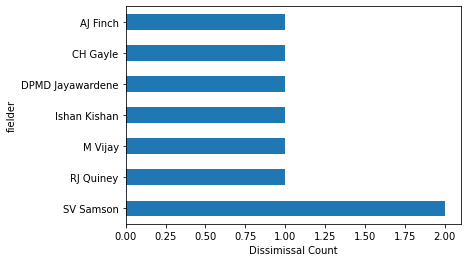

In [25]:
super_fielderdf = super_over.query(
    'dismissal_kind =="caught" | dismissal_kind =="run out" ')
super_fielders = super_fielderdf.groupby(
    'fielder')['match_id'].count().sort_values(ascending=False)

#plotting top 10 bowlers
super_fielders[:10].plot(kind="barh")
plt.xlabel('Dissimissal Count')
plt.show()

###### Interpretation - 
* So Sanju Samson is peforming best in super over fieldings and the rest fielders are - [ 'RJ Quiney', 'M Vijay', 'Ishan Kishan', 'DPMD Jayawardene','CH Gayle', 'AJ Finch']

###### Least Contributing players
`Lets analyze  the least performing player overall`

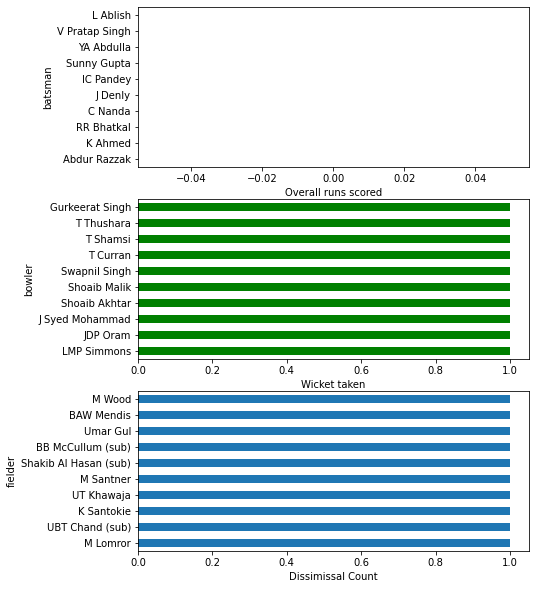

In [26]:
batsman = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(
    ascending=True)
bowling = wicket.groupby('bowler')['match_id'].count().sort_values(
    ascending=True)
fielders = field_df.groupby('fielder')['match_id'].count().sort_values(
    ascending=True)

#plotting graphs
plt.figure(figsize=(7, 10))
ax1 = plt.subplot(311)
batsman[:10].plot(kind="barh", ax=ax1)
ax1.set_xlabel('Overall runs scored')

ax2 = plt.subplot(312)
bowling[:10].plot(kind="barh", ax=ax2, color="green")
ax2.set_xlabel('Wicket taken')

ax3 = plt.subplot(313)
fielders[:10].plot(kind="barh", ax=ax3)
ax3.set_xlabel('Dissimissal Count')
plt.show()

###### Interpretation - 
* ['Abdur Razzak', 'K Ahmed', 'RR Bhatkal', 'C Nanda', 'J Denly', 'IC Pandey', 'Sunny Gupta', 'YA Abdulla', 'V Pratap Singh', 'L Ablish'] are least contributing batsman having 0 runs.
* ['LMP Simmons', 'JDP Oram', 'J Syed Mohammad', 'Shoaib Akhtar','Shoaib Malik', 'Swapnil Singh', 'T Curran', 'T Shamsi', 'T Thushara','Gurkeerat Singh'] are least contributing bowlers taken 1 wicket overall.
* ['M Lomror', 'UBT Chand (sub)', 'K Santokie', 'UT Khawaja', 'M Santner','Shakib Al Hasan (sub)', 'BB McCullum (sub)', 'Umar Gul', 'BAW Mendis','M Wood'] are taken 1 catch.

### Conclusion - 
* The most successful teams in ipl are:
<ul>
    <li><b>Mumbai Indians</b> - Overall having highest winnings in all seasons but performance having low in even years</li>
    <li><b>Chennai Super Kings</b> - Overall having 2nd highest winnings in all seasons and best performance in home matches</li>
    <li><b>Kolkata Knight Riders</b> - 3rd highest winnings in all seasons and best performance in all home matches.</li>
    <li><b>Royal Challengers Bangalore</b>-4th highest winnings in all seasons and average performance in home matches.</li>
    <li><b>Kings XI Punjab</b> - Overall 5th in winnings in all seasons and home winnings in 2018 and 2019.</li>
    <li><b>Delhi Daredevils</b> - Overall having best performance in run chasing and good performance in leap years</li>
    <li><b>Rajasthan Royals</b> - Overall having 7th highest in ranking and average winnings in home performance.</li>
</ul>

* And the most valuable players in all seasons are- 
'V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle','MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir','YK Pathan', 'SR Watson'.


* The most valuable bowlers in all seasons are - SL Malinga', 'PP Chawla', 'SP Narine', 'B Kumar', 'Harbhajan Singh','RA Jadeja', 'A Mishra', 'R Ashwin', 'DW Steyn', 'DJ Bravo'


* The most valuable fielders in all seasons are - 'KD Karthik', 'MS Dhoni', 'SK Raina', 'AB de Villiers', 'RV Uthappa','RG Sharma', 'V Kohli', 'KA Pollard', 'PA Patel', 'RA Jadeja'


* The most valuable wickets keepers in all seasons are - MS Dhoni, RV Uthappa, KD Karthik,'WP Saha', 'AC Gilchrist', 'PA Patel', 'NV Ojha', 'KC Sangakkara','RR Pant', 'Q de Kock'

* So the player in which ad company or sponsors should endorse more are - 'V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle','MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir', 'SR Watson', SL Malinga', 'PP Chawla', 'SP Narine', 'B Kumar', 'Harbhajan Singh','RA Jadeja', 'A Mishra', 'R Ashwin', 'DW Steyn', 'DJ Bravo', 'KD Karthik','RG Sharma', 'KA Pollard', 'PA Patel','WP Saha', 'PA Patel', 'NV Ojha', 'KC Sangakkara','RR Pant', 'Q de Kock'
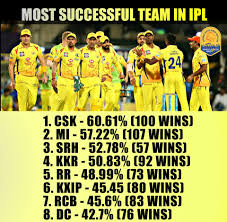
<p>This picture is from a post on facebook on 27 february 2020 <a target="_blank" href="https://www.facebook.com/CSKFansOfficial/photos/a.268631753309231/1396903210482074/?type=3&eid=ARDtFq1KBAPcec5_WSC-ihRaCQM7tljjYF5U5MeKaHgvjKfPIUXvN6DFb6T4Cn9E6irzWbHe7h8qzdbq">Check the post here.</a></p>
<a target="_blank" href="https://timesofindia.indiatimes.com/sports/cricket/ipl/stats/team-with-most-wins">For more information. By TOI</a>

### Thank You